# HW 2

## Use AAPL.csv file and answer the following questions:

Create 5 different series based on AAPL.cvs file's column 'Open', 'Close', 'High', 'Low', 'Volume' and name the series accordingly.

In [2]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
data = pd.read_csv('AAPL.csv',index_col=0, parse_dates=True)
stock_o = data['Open']
stock_c = data['Close']
stock_h = data['High']
stock_l = data['Low'] 
stock_v = data['Volume']

In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.023106,117258400.0
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.021900,43971200.0
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.020293,26432000.0
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.020795,21610400.0
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.021398,18362400.0


## Q1

### Q1.1, How many trading days this data set cover? (fill in the number in Camino)

In [5]:
len(data)

9609

Or ..

In [6]:
len(stock_o)

9609

But if you use .count(), which will exclude any NaN value. I will take this answer too.

In [8]:
data.Close.count()

9608

In [10]:
# this is the code to figure out how many NaN in your data
data.Close.isna().sum()

1

In [13]:
#There is one day with NaN value
data.Close[data.Close.isna()]

Date
1981-08-10   NaN
Name: Close, dtype: float64

### Q1.2, What's the open price at 2015-07-01? (choose the closest price in Camino)

In [14]:
stock_o['2015-07-01']

126.900002

### Q1.3, What's the average closing price in 2018 first quarter (2018-01-01 to 2018-03-31)? (choose the closest price in Camino)

In [15]:
stock_c['2018-01-01':'2018-03-31'].mean()

172.1913116557377

### Q1.4, Based on day high and day low, find the top 5 dates with the biggest value change within 1 trading day. Sort them based on value change, highest on top. (choose the 1st date in Camino)

In [16]:
(stock_h - stock_l).sort_values(ascending=False).head(5)

Date
2015-08-24    16.800003
2018-10-29    13.600006
2018-12-26    10.509995
2018-10-10    10.300003
2018-02-06     9.720001
dtype: float64

### Q1.5, Plot the closing price vs date graph. (fill in the command you used to plot the graph in Camino)

Populating the interactive namespace from numpy and matplotlib


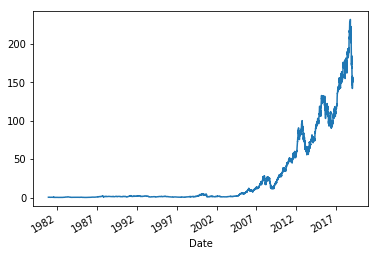

In [17]:
%pylab inline
stock_c.plot()

## Q2

### Q2.1, Total how many trading days the stock price close at below 50 dollars ? (fill in the number in Camino)

In [18]:
len(stock_c[stock_c < 50])

7682

### Q2.2, When is the first time this stock close at more than 50 dollars? Show the date only. (choose the right date in Camino)

In [19]:
stock_c[stock_c > 50].head(1).index[0]

Timestamp('2011-02-07 00:00:00')

In [20]:
stock_c[stock_c > 50].head()

Date
2011-02-07    50.268570
2011-02-08    50.742859
2011-02-09    51.165714
2011-02-10    50.648571
2011-02-11    50.978573
Name: Close, dtype: float64

### Q2.3, Within the dates with price close at more than 50 dollars, find out how many days the trading volume is higher than 100 million shares. (choose the right number in Camino)

In [21]:
stock_over_50 = stock_c[stock_c > 50]

In [22]:
len(stock_over_50[stock_v[stock_over_50.index] > 100000000])

404

Or ..

In [23]:
(stock_v[stock_over_50.index] > 100000000).sum()

404

## Q3

### Q3.1, For dates with price close at more than 100 dollars, how many days are before 2014-01-01 ? Show the date and stock price.  (choose the number of days in Camino)

In [24]:
stock_over_100 = stock_c[stock_c > 100]

In [25]:
stock_over_100[stock_over_100.index < '2014-01-01']

Date
2012-09-18    100.272858
2012-09-19    100.300003
2012-09-21    100.012856
Name: Close, dtype: float64

### Q3.2, Show the top 5 trading volume(date and volume) for stock price over 100 dollars. (choose the largest volume date in Camino)

In [26]:
stock_over_100 = stock_c[stock_c > 100.00]

In [27]:
stock_v[stock_over_100.index].nlargest(5)

Date
2015-08-24    162206300.0
2015-01-28    146477100.0
2012-09-21    142897300.0
2015-08-21    128275500.0
2015-08-04    124138600.0
Name: Volume, dtype: float64

### Q3.3, Based on top 5 trading volume dates for stock price over 100 dollars, find the matching closing price and sort them based on price, highest one on top. (choose the first date in Camino)

In [28]:
trading_v_top5_index=stock_v[stock_over_100.index].nlargest(5).index
trading_v_top5_index

DatetimeIndex(['2015-08-24', '2015-01-28', '2012-09-21', '2015-08-21',
               '2015-08-04'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [29]:
stock_c[trading_v_top5_index].sort_values(ascending=False)

Date
2015-01-28    115.309998
2015-08-04    114.639999
2015-08-21    105.760002
2015-08-24    103.120003
2012-09-21    100.012856
Name: Close, dtype: float64

### Q3.4, Based on top 5 trading volume dates for stock price over 100 dollars, which date it lost the most per share? (choose the date in Camino)

In [30]:
stock_c[trading_v_top5_index]-stock_o[trading_v_top5_index]

Date
2015-08-24    8.250000
2015-01-28   -2.319999
2012-09-21   -0.331428
2015-08-21   -4.669998
2015-08-04   -2.779999
dtype: float64

In [31]:
(stock_c[trading_v_top5_index]-stock_o[trading_v_top5_index]).nsmallest(1)

Date
2015-08-21   -4.669998
dtype: float64

Or..

In [32]:
(stock_c[trading_v_top5_index]-stock_o[trading_v_top5_index]).idxmin()

Timestamp('2015-08-21 00:00:00')

### Q-extra,  From the previous stock chart, we know this stock on average had been growing constantly till recent months. Let's pick stock closing price at 150 dollars as checkpoint.  Find out two dates that are closest(or equal) to 150(one should be before hitting the max, and the other is after hitting the max). Use these two dates to compare with the date that stock hit the max. What's the ratio between the days it took from 150 reached max and the days it took from max dropped back to 150.

In [33]:
max_date = stock_c.nlargest(1).index[0]
max_date

Timestamp('2018-10-03 00:00:00')

In [34]:
closest_to_150 = (stock_c - 150.0).abs().nsmallest(2)
closest_to_150

Date
2019-01-14    0.000000
2017-08-01    0.050003
Name: Close, dtype: float64

In [35]:
drop_to_150 = closest_to_150.index[0]
drop_to_150

Timestamp('2019-01-14 00:00:00')

In [36]:
grow_to_150 = closest_to_150.index[1]
grow_to_150

Timestamp('2017-08-01 00:00:00')

In [37]:
days_drop_from_max_to_150 = drop_to_150 - max_date
days_drop_from_max_to_150

Timedelta('103 days 00:00:00')

In [38]:
days_grow_from_150_to_max = max_date - grow_to_150
days_grow_from_150_to_max

Timedelta('428 days 00:00:00')

In [39]:
days_grow_from_150_to_max/days_drop_from_max_to_150

4.155339805825243